# Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
def read_json(file):
    reader = pd.read_json(f"Data/{file}.json")
    return reader[['onetsoc_code','element_id', 'scale_id', 'data_value']]

In [3]:
knowledge = read_json("knowledge")
skills = read_json("skills")
work_activities = read_json("work_activities")

In [4]:
knowledge.head(10)

,onetsoc_code,element_id,scale_id,data_value
0,11-1011.00,2.C.1.a,IM,4.75
1,11-1011.00,2.C.1.a,LV,6.23
2,11-1011.00,2.C.1.b,IM,2.66
3,11-1011.00,2.C.1.b,LV,3.50
4,11-1011.00,2.C.1.c,IM,3.70
5,11-1011.00,2.C.1.c,LV,4.36
6,11-1011.00,2.C.1.d,IM,3.23
7,11-1011.00,2.C.1.d,LV,3.90
8,11-1011.00,2.C.1.e,IM,4.09
9,11-1011.00,2.C.1.e,LV,5.55


In [5]:
skills.tail(10)

,onetsoc_code,element_id,scale_id,data_value
67008,53-7121.00,2.B.4.h,IM,2.12
67009,53-7121.00,2.B.4.h,LV,2.12
67010,53-7121.00,2.B.5.a,IM,3.12
67011,53-7121.00,2.B.5.a,LV,2.88
67012,53-7121.00,2.B.5.b,IM,2.00
67013,53-7121.00,2.B.5.b,LV,1.12
67014,53-7121.00,2.B.5.c,IM,2.00
67015,53-7121.00,2.B.5.c,LV,1.88
67016,53-7121.00,2.B.5.d,IM,2.88
67017,53-7121.00,2.B.5.d,LV,2.75


In [6]:
work_activities.tail(10)

,onetsoc_code,element_id,scale_id,data_value
79320,53-7121.00,4.A.4.b.5,IM,3.07
79321,53-7121.00,4.A.4.b.5,LV,3.28
79322,53-7121.00,4.A.4.b.6,IM,2.72
79323,53-7121.00,4.A.4.b.6,LV,2.40
79324,53-7121.00,4.A.4.c.1,IM,2.54
79325,53-7121.00,4.A.4.c.1,LV,2.27
79326,53-7121.00,4.A.4.c.2,IM,1.93
79327,53-7121.00,4.A.4.c.2,LV,1.60
79328,53-7121.00,4.A.4.c.3,IM,2.56
79329,53-7121.00,4.A.4.c.3,LV,2.64


### Required knowledge

In [7]:
len(knowledge["onetsoc_code"].value_counts())

967

In [8]:
knowledge["onetsoc_code"].value_counts().sort_values()

43-4111.00    55
43-4131.00    61
21-1015.00    66
47-2031.01    66
33-2021.02    66
              ..
19-3011.00    66
41-3099.01    66
51-6021.00    66
21-1021.00    66
33-2021.01    66
Name: onetsoc_code, Length: 967, dtype: int64

In [9]:
len(knowledge.groupby(["element_id"]).size())

33

### Required skills

In [10]:
len(skills["onetsoc_code"].value_counts())

959

In [11]:
skills["onetsoc_code"].value_counts().sort_values()

49-2093.00    29
33-9021.00    32
49-3021.00    42
33-3051.01    65
25-1072.00    70
              ..
19-3011.00    70
41-3099.01    70
51-6021.00    70
47-5051.00    70
13-1111.00    70
Name: onetsoc_code, Length: 959, dtype: int64

In [12]:
len(skills.groupby(["element_id"]).size())

35

### Work activities

In [13]:
len(work_activities["onetsoc_code"].value_counts())

968

In [14]:
work_activities["onetsoc_code"].value_counts().sort_values()

47-1011.00    36
47-2031.01    82
33-2021.02    82
39-5012.00    82
13-1151.00    82
              ..
41-3099.01    82
51-6021.00    82
27-2023.00    82
27-3022.00    82
33-2021.01    82
Name: onetsoc_code, Length: 968, dtype: int64

In [15]:
len(work_activities.groupby(["element_id"]).size())

41

## Reducing number of jobs

In [16]:
c = 0

for job in skills["onetsoc_code"].unique():
    if job in list(knowledge["onetsoc_code"]) :
        c+=1  
    else:
        print("In knowledge dataset there is no any data about: " + str(job) + " job")
print("There is " + str(c) + " matches between jobs described in skills and knowledge dataset")

In knowledge dataset there is no any data about: 43-4121.00 job
There is 958 matches between jobs described in skills and knowledge dataset


In [17]:
c = 0

for job in skills["onetsoc_code"].unique():
    if job in list(work_activities["onetsoc_code"]) :
        c+=1  
    else:
        print("In knowledge dataset there is no any data about: " + str(job) + " job")
print("There is " + str(c) + " matches between jobs described in skills and work_activities dataset")

There is 959 matches between jobs described in skills and work_activities dataset


## From the analysis above we can conclude that:

- All of three datasets should have 958 job titles (We need to drop "43-4121.00" because knowledge dataset does not contain any data for it)
- <b>Skills dataset</b> does not contain 70 skills for: <b>49-2093.00, 33-9021.00, 49-3021.00, 33-3051.01</b> as others. It means that they would be dropped.
- The same thing is happening for job titles: <b>43-4111.00, 43-4131.00 in knowledge dataset</b>.
- <b>47-1011.00 would be dropped from work_activities because of that reason</b>

# Let's start with cleaning


### Step 1:

In [18]:
knowledge.drop(knowledge.loc[knowledge['onetsoc_code']=="43-4121.00"].index, inplace=True)

In [19]:
skills.drop(skills.loc[skills['onetsoc_code']=="43-4121.00"].index, inplace=True)

### Step 2:

In [20]:
skills.drop(skills.loc[skills['onetsoc_code']=="49-2093.00"].index, inplace=True)
skills.drop(skills.loc[skills['onetsoc_code']=="33-9021.00"].index, inplace=True)
skills.drop(skills.loc[skills['onetsoc_code']=="49-3021.00"].index, inplace=True)
skills.drop(skills.loc[skills['onetsoc_code']=="33-3051.01"].index, inplace=True)

### Step 3:

In [21]:
knowledge.drop(knowledge.loc[knowledge['onetsoc_code']=="43-4111.00"].index, inplace=True)
knowledge.drop(knowledge.loc[knowledge['onetsoc_code']=="43-4131.00"].index, inplace=True)

skills.drop(skills.loc[skills['onetsoc_code']=="43-4111.00"].index, inplace=True)
skills.drop(skills.loc[skills['onetsoc_code']=="43-4131.00"].index, inplace=True)

work_activities.drop(work_activities.loc[work_activities['onetsoc_code']=="43-4111.00"].index, inplace=True)
work_activities.drop(work_activities.loc[work_activities['onetsoc_code']=="43-4131.00"].index, inplace=True)

In [22]:
work_activities.drop(work_activities.loc[work_activities['onetsoc_code']=="47-1011.00"].index, inplace=True)

knowledge.drop(knowledge.loc[knowledge['onetsoc_code']=="47-1011.00"].index, inplace=True)

skills.drop(skills.loc[skills['onetsoc_code']=="47-1011.00"].index, inplace=True)

# Concatenating datasets

In [23]:
knowledge = knowledge[knowledge["onetsoc_code"].isin(skills["onetsoc_code"])]

In [24]:
work_activities = work_activities[work_activities["onetsoc_code"].isin(skills["onetsoc_code"])]

In [25]:
print("Work activities shape: " + str(work_activities.shape) + "\n" + "Skills shape: " + str(skills.shape) + "\n" + "Knowledge shape: " + str(knowledge.shape))

Work activities shape: (77982, 4)
Skills shape: (66570, 4)
Knowledge shape: (62766, 4)


### Computing mean of skills

In [26]:
knowledge = knowledge.groupby(["onetsoc_code", "element_id"]).mean().reset_index()
skills = skills.groupby(["onetsoc_code", "element_id"]).mean().reset_index()
work_activities = work_activities.groupby(["onetsoc_code", "element_id"]).mean().reset_index()

In [27]:
knowledge.head()

,onetsoc_code,element_id,data_value
0,11-1011.00,2.C.1.a,5.490
1,11-1011.00,2.C.1.b,3.080
2,11-1011.00,2.C.1.c,4.030
3,11-1011.00,2.C.1.d,3.565
4,11-1011.00,2.C.1.e,4.820


In [28]:
skills.shape

(33285, 3)

In [29]:
work_activities.head()

,onetsoc_code,element_id,data_value
0,11-1011.00,4.A.1.a.1,5.035
1,11-1011.00,4.A.1.a.2,4.220
2,11-1011.00,4.A.1.b.1,4.555
3,11-1011.00,4.A.1.b.2,2.245
4,11-1011.00,4.A.1.b.3,3.655


In [30]:
skills = skills.pivot(index='onetsoc_code', columns='element_id', values='data_value')
knowledge = knowledge.pivot(index='onetsoc_code', columns='element_id', values='data_value')
work_activities = work_activities.pivot(index='onetsoc_code', columns='element_id', values='data_value')

In [31]:
final_dataset = pd.concat([skills, knowledge, work_activities], axis = 1)

In [32]:
final_dataset.shape

(951, 109)

In [33]:
final_dataset.head()

element_id,2.A.1.a,2.A.1.b,2.A.1.c,2.A.1.d,2.A.1.e,2.A.1.f,2.A.2.a,2.A.2.b,2.A.2.c,2.A.2.d,...,4.A.4.a.8,4.A.4.b.1,4.A.4.b.2,4.A.4.b.3,4.A.4.b.4,4.A.4.b.5,4.A.4.b.6,4.A.4.c.1,4.A.4.c.2,4.A.4.c.3
onetsoc_code,,,,,,,,,,,,,,,,,,,,,
11-1011.00,4.435,4.50,4.190,4.630,3.435,1.500,4.565,4.375,3.500,4.81,...,3.145,4.525,4.865,3.170,5.230,4.36,4.535,3.635,4.165,5.220
11-1011.03,4.125,4.00,4.130,4.125,3.065,1.625,4.060,3.625,3.440,3.87,...,3.520,4.575,4.385,4.400,4.280,4.18,4.820,3.405,3.195,3.830
11-1021.00,3.940,4.00,3.565,4.000,2.440,1.500,3.940,3.560,3.125,4.00,...,4.005,4.365,3.725,3.770,4.470,4.13,3.985,3.370,3.715,4.190
11-2011.00,3.875,4.12,3.815,4.060,3.125,1.120,4.060,3.685,3.125,3.75,...,3.495,3.470,3.035,2.785,3.120,2.95,2.415,3.380,2.300,2.800
11-2021.00,4.065,4.00,3.565,4.000,2.935,1.625,4.065,4.000,3.310,4.00,...,2.940,4.400,4.170,3.240,4.035,3.55,3.760,2.770,2.215,3.515


In [34]:
final_dataset.index.name

'onetsoc_code'

# Training a model

In [35]:
from sklearn.cluster import KMeans
import seaborn as sns

In [36]:
clusters = []

for i in range(1, 50):
    km = KMeans(n_clusters = i).fit(final_dataset)
    clusters.append(km.inertia_)

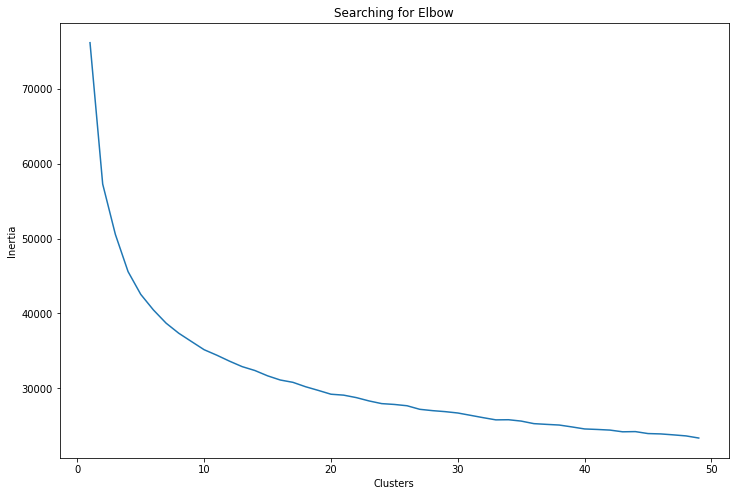

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x = list(range(1, 50)), y = clusters, ax = ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()